In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

lol_api_key = "RGAPI-3c747a16-7c90-4dbc-a531-864bd613df11"
tft_api_key = "RGAPI-eeff3e13-054b-49ad-92e9-bf0cd91cb132"

myGameName = "Exgeniar"
myTagLine  = "NA2"

REGION = "na1"
MATCH_REGION = 'americas'
HEADERS = {"X-Riot-Token": tft_api_key }


def get_tft_puuid(gameName, tagLine):
    url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{gameName}/{tagLine}"
    res = requests.get(url, headers=HEADERS)
    return res.json().get("puuid")
    
def get_tft_match_ids(puuid, count=100):
    url = f"https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/{puuid}/ids"
    res = requests.get(url, headers=HEADERS, params={"start": 0, "count": count})
    return res.json()

def get_tft_match(match_id):
    url = f"https://americas.api.riotgames.com/tft/match/v1/matches/{match_id}"
    res = requests.get(url, headers=HEADERS)
    return res.json()

def tft_match_to_df(match_json):
    participants = match_json['info']['participants']
    return pd.json_normalize(participants, sep='_')

def flatten_traits(traits):
    # Create {trait_name: tier} for each active trait (tier > 0)
    return {
        trait['name']: trait['tier_current']
        for trait in traits if trait.get('tier_current', 0) > 0
    }

def flatten_units(units):
    return {
        unit['character_id']: unit['tier']
        for unit in units
    }


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)  # Don't wrap lines
pd.set_option('display.max_colwidth', None)  # Show full content in each column

In [3]:
puuid = get_tft_puuid ( myGameName, myTagLine )
tft_match_history = get_tft_match_ids ( puuid )
match_Data = get_tft_match ( tft_match_history[0] )
df = tft_match_to_df (  match_Data )

In [4]:
print ( tft_match_history )

['NA1_5285677683', 'NA1_5285646497', 'NA1_5285458274', 'NA1_5285422848', 'NA1_5284873270', 'NA1_5284863343', 'NA1_5284854736', 'NA1_5284839627', 'NA1_5284829536', 'NA1_5284790467', 'NA1_5284759352', 'NA1_5284730537', 'NA1_5284718190', 'NA1_5284678443', 'NA1_5284630467', 'NA1_5284588827', 'NA1_5284437722', 'NA1_5284389434', 'NA1_5284340535', 'NA1_5284082937', 'NA1_5284061658', 'NA1_5283969795', 'NA1_5283776973', 'NA1_5283713219', 'NA1_5283641965', 'NA1_5283596767', 'NA1_5283584812', 'NA1_5283454806', 'NA1_5283432443', 'NA1_5283407680', 'NA1_5283292313', 'NA1_5283227440', 'NA1_5282798458', 'NA1_5282415192', 'NA1_5282399036', 'NA1_5282359542', 'NA1_5282243862', 'NA1_5282180357', 'NA1_5282112417', 'NA1_5281175665', 'NA1_5281083497', 'NA1_5280904636', 'NA1_5280854920', 'NA1_5280805493', 'NA1_5280628917', 'NA1_5280508646', 'NA1_5280466031', 'NA1_5280236943', 'NA1_5279385134', 'NA1_5279360249', 'NA1_5279256920', 'NA1_5279123290', 'NA1_5279099869', 'NA1_5279019120', 'NA1_5278962963', 'NA1_5278

In [5]:
match_Data['info']['participants']

[{'companion': {'content_ID': 'dfe0c8b5-06c5-4cac-838a-14a4d4f9f384',
   'item_ID': 53013,
   'skin_ID': 13,
   'species': 'PetCreepyCat'},
  'gold_left': 3,
  'last_round': 26,
  'level': 8,
  'missions': {'PlayerScore2': 82},
  'placement': 8,
  'players_eliminated': 0,
  'puuid': 'Yy8omzjfWsibMdxfbguiSFbv8oMYU6AEuNvt_KmvFa8uzod8XkQbLfgrrfWH0v0F_KfWMQFGAAsyAw',
  'riotIdGameName': '31alsrowsue5ggfp',
  'riotIdTagline': 'x32xg',
  'time_eliminated': 1630.2872314453125,
  'total_damage_to_players': 29,
  'traits': [{'name': 'TFT14_AnimaSquad',
    'num_units': 3,
    'style': 1,
    'tier_current': 1,
    'tier_total': 4},
   {'name': 'TFT14_Bruiser',
    'num_units': 1,
    'style': 0,
    'tier_current': 0,
    'tier_total': 3},
   {'name': 'TFT14_Immortal',
    'num_units': 6,
    'style': 4,
    'tier_current': 3,
    'tier_total': 3},
   {'name': 'TFT14_Marksman',
    'num_units': 2,
    'style': 1,
    'tier_current': 1,
    'tier_total': 2},
   {'name': 'TFT14_Strong',
    'num_

In [6]:
df = pd.json_normalize(match_Data['info']['participants'], sep='_')
print ( df.keys())

Index(['gold_left', 'last_round', 'level', 'placement', 'players_eliminated',
       'puuid', 'riotIdGameName', 'riotIdTagline', 'time_eliminated',
       'total_damage_to_players', 'traits', 'units', 'win',
       'companion_content_ID', 'companion_item_ID', 'companion_skin_ID',
       'companion_species', 'missions_PlayerScore2'],
      dtype='object')


In [7]:
df.drop(['companion_content_ID', 'companion_item_ID', 'companion_skin_ID',
       'companion_species', 'missions_PlayerScore2'], axis = 1 , inplace = True)
print ( df.keys())

Index(['gold_left', 'last_round', 'level', 'placement', 'players_eliminated',
       'puuid', 'riotIdGameName', 'riotIdTagline', 'time_eliminated',
       'total_damage_to_players', 'traits', 'units', 'win'],
      dtype='object')


In [8]:
print ( df )

   gold_left  last_round  level  placement  players_eliminated  \
0          3          26      8          8                   0   
1          0          34      8          3                   1   
2          1          30      8          6                   0   
3         32          38      8          1                   2   
4          1          30      9          7                   0   
5          8          38      9          2                   2   
6          1          33      8          4                   1   
7         55          33      9          5                   0   

                                                                            puuid  \
0  Yy8omzjfWsibMdxfbguiSFbv8oMYU6AEuNvt_KmvFa8uzod8XkQbLfgrrfWH0v0F_KfWMQFGAAsyAw   
1  y_upNZyAZH49kRcOwS1Hxa-D8VtDNma1lz9sHMuumCgmc6jd_dtSaGlgAyTIHnwL3hoheYPOHyopRg   
2  Aekp5QmtcRiQrvYuHqsLRcFSiWYVRolFnSJbiXMqWDtSiVwF2WxPFK_SW8o3Ce0OTnbZsFlDLluepQ   
3  D9ZwrdOEXPxHDnF0wTJVbrmZl0uPiRu9HA1PUuMGONHbU8nts6vHgHp1s0JaW3

In [9]:
traits_flat = df['traits'].apply(flatten_traits).apply(pd.Series).fillna(0).astype(int)
traits_flat.columns = [f"trait_{c}" for c in traits_flat.columns]



In [10]:
print ( traits_flat )

   trait_TFT14_AnimaSquad  trait_TFT14_Immortal  trait_TFT14_Marksman  \
0                       1                     3                     1   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     1   
5                       0                     0                     0   
6                       0                     0                     0   
7                       0                     1                     0   

   trait_TFT14_Strong  trait_TFT14_Vanguard  trait_TFT14_ViegoUniqueTrait  \
0                   1                     1                             1   
1                   0                     0                             0   
2                   2                     1                             0   
3                   0             

In [11]:
units_flat = df['units'].apply(flatten_units).apply(pd.Series).fillna(0).astype(int)
units_flat.columns = [f"unit_{c}" for c in units_flat.columns]

In [12]:
print ( units_flat )

   unit_TFT14_Alistar  unit_TFT14_Vayne  unit_TFT14_Jarvan  unit_TFT14_Xayah  \
0                   2                 1                  2                 2   
1                   0                 0                  0                 0   
2                   0                 0                  2                 0   
3                   0                 0                  0                 0   
4                   0                 0                  0                 0   
5                   0                 0                  0                 0   
6                   0                 0                  0                 0   
7                   2                 0                  0                 0   

   unit_TFT14_Annie  unit_TFT14_Leona  unit_TFT14_Aphelios  unit_TFT14_Viego  \
0                 1                 1                    1                 1   
1                 0                 0                    0                 0   
2                 0                 0  

In [13]:
final_df = pd.concat([
    df.drop(columns=['traits', 'units']),
    traits_flat,
    units_flat
], axis=1)

final_df.sort_values(by='placement' , inplace=True )

In [14]:
final_df

,gold_left,last_round,level,placement,players_eliminated,puuid,riotIdGameName,riotIdTagline,time_eliminated,total_damage_to_players,win,trait_TFT14_AnimaSquad,trait_TFT14_Immortal,trait_TFT14_Marksman,trait_TFT14_Strong,trait_TFT14_Vanguard,trait_TFT14_ViegoUniqueTrait,trait_TFT14_Controller,trait_TFT14_StreetDemon,trait_TFT14_Techie,trait_TFT14_Bruiser,trait_TFT14_Divinicorp,trait_TFT14_EdgeRunner,trait_TFT14_Mob,trait_TFT14_Swift,trait_TFT14_Armorclad,trait_TFT14_Cutter,trait_TFT14_Thirsty,trait_TFT14_Supercharge,trait_TFT14_Cyberboss,unit_TFT14_Alistar,unit_TFT14_Vayne,unit_TFT14_Jarvan,unit_TFT14_Xayah,unit_TFT14_Annie,unit_TFT14_Leona,unit_TFT14_Aphelios,unit_TFT14_Viego,unit_TFT14_Chogath,unit_TFT14_Zyra,unit_TFT14_DrMundo,unit_TFT14_Ekko,unit_TFT14_Jinx,unit_TFT14_Rengar,unit_TFT14_Neeko,unit_TFT14_Brand,unit_TFT14_Ziggs,unit_TFT14_Morgana,unit_TFT14_Rhaast,unit_TFT14_Senna,unit_TFT14_Gragas,unit_TFT14_Vex,unit_TFT14_Zed,unit_TFT14_Kindred,unit_TFT14_TwistedFate,unit_TFT14_Darius,unit_TFT14_Braum,unit_TFT14_Draven,unit_TFT14_Mordekaiser,unit_TFT14_Sejuani,unit_TFT14_Zeri,unit_TFT14_Jax,unit_TFT14_Jhin,unit_TFT14_Naafiri,unit_TFT14_Varus,unit_TFT14_Kobuko,unit_TFT14_Shaco,unit_TFT14_MissFortune,unit_TFT14_Aurora,unit_TFT14_NidaleeCougar,unit_TFT14_LeBlanc,unit_TFT14_Yuumi
3,32,38,8,1,2,D9ZwrdOEXPxHDnF0wTJVbrmZl0uPiRu9HA1PUuMGONHbU8nts6vHgHp1s0JaW3NcY4UxCeHDJdODew,Exgeniar,NA2,2323.589600,151,True,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0
5,8,38,9,2,2,DxFcqJssBcXgqAeGOPV6X2ouxVKXxx8JS4OhAAIr4PEEzogGGfMrCj9KR8lFIZOJTyU6QriJFlV6JA,Rookie03,666,2322.688477,138,True,0,0,0,0,1,0,0,0,0,1,2,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,3,3,3,2,0,0,0,0,0,0,0,0,2,2,2,0,0,0
1,0,34,8,3,1,y_upNZyAZH49kRcOwS1Hxa-D8VtDNma1lz9sHMuumCgmc6jd_dtSaGlgAyTIHnwL3hoheYPOHyopRg,Frieza,gold,2130.017090,116,True,0,0,0,0,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,33,8,4,1,89GhuLJKmM12SxBVTT83GivFNlrOwa1SQ5ES_pg7ziRHrqhk96ara-7rk-AW-Fc7VOXrrSrUvhGFGA,90岁拄拐打野,8072,2046.727783,99,True,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,0,0,0,1,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,2,3
7,55,33,9,5,0,Hyjw5dtD5Fka6hUFKi7NyABA4vUU8om9e8DJxfZjR5cKr002t_1n9Km6e3krk_gmqEjm8KGZ3Nl6nQ,LifeinIce,NA1,2069.808350,91,False,0,1,0,0,0,0,1,0,0,3,1,0,0,0,0,0,0,1,1,2,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,2
2,1,30,8,6,0,Aekp5QmtcRiQrvYuHqsLRcFSiWYVRolFnSJbiXMqWDtSiVwF2WxPFK_SW8o3Ce0OTnbZsFlDLluepQ,Chev,Guy,1874.033691,76,False,0,0,0,2,1,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,2,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,30,9,7,0,jvCX7hYG3h8bj8ggZ9w-nxhgXwWz0I0Hd68jE1C_vavehT-7az40Vbb_XxjlZK6cHP-fch_9rW3WIA,Peachhysoju,NA1,1872.531738,83,False,0,0,1,0,0,1,0,0,1,1,0,3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,1,1,2,2,1,1,0,0,0,0,0,0
0,3,26,8,8,0,Yy8omzjfWsibMdxfbguiSFbv8oMYU6AEuNvt_KmvFa8uzod8XkQbLfgrrfWH0v0F_KfWMQFGAAsyAw,31alsrowsue5ggfp,x32xg,1630.287231,29,False,1,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_damage_placement = final_df [[ 'placement', 'total_damage_to_players']]

In [16]:
df_damage_placement

,placement,total_damage_to_players
3,1,151
5,2,138
1,3,116
6,4,99
7,5,91
2,6,76
4,7,83
0,8,29


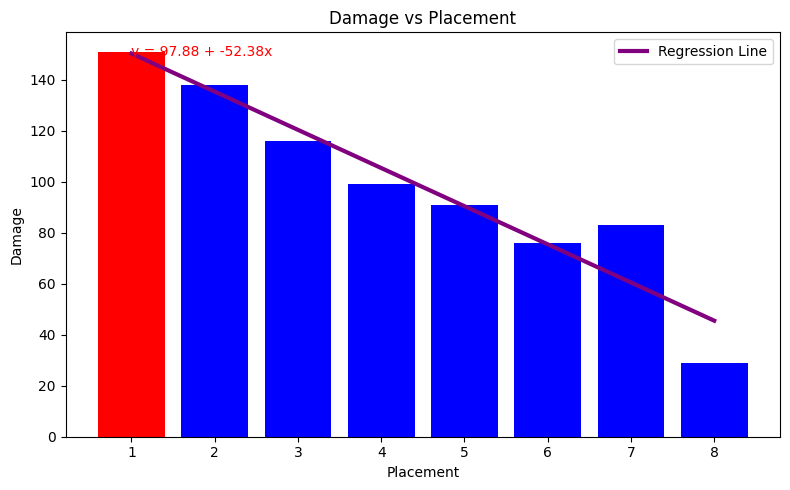

In [17]:
# Extract numeric data



x = df_damage_placement['placement'].to_numpy()
y = df_damage_placement['total_damage_to_players'].to_numpy()

# Fit a 1st-degree polynomial (linear regression)
p = Polynomial.fit(x, y, deg=1)

# Evaluate regression line at x points
x_sorted = np.sort(x)
y_fit = p(x_sorted)

# Get coefficients: y = a + b*x
a, b = p.coef
equation_text = f"y = {a:.2f} + {b:.2f}x"

# Color logic
whatsMyPlacement = df.loc[df['riotIdGameName'] == 'Exgeniar', 'placement']
placement_me = whatsMyPlacement.iloc[0] if not whatsMyPlacement.empty else 0
colors = ['red' if cat == placement_me else 'blue' for cat in x]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x, y, color=colors)
plt.plot(x_sorted, y_fit, color='purple', linewidth=3, label='Regression Line')
plt.title("Damage vs Placement")
plt.xlabel("Placement")
plt.ylabel("Damage")

# Display regression equation
plt.text(x.min(), y.max(), equation_text, fontsize=10, color='red', verticalalignment='center')

plt.legend()
plt.tight_layout()
plt.show()